# Working with sqlite3 database

In [1]:
import sqlite3

### Connecting to database

In [2]:
conn = sqlite3.connect("files/sampledb.db")

In [3]:
c = conn.cursor()

### Creating table in database

In [4]:
def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS table1(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")

### Inserting value into the table

In [5]:
def data_entry():
    c.execute("INSERT INTO table1 VALUES(1452549219,'2016-01-11 13:53:39','Python',6)")
    conn.commit()

### Inserting variables to database table

In [6]:
import time
import datetime
import random

In [7]:
def dynamic_data_to_database():
    unix = time.time()
    date = str(datetime.datetime.fromtimestamp(unix).strftime("%Y-%m-%d %H:%M:%S"))
    keyword = "Python"
    value = random.randrange(0,10)
    c.execute("INSERT INTO table1 (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",(unix, date, keyword, value))
    conn.commit()

In [8]:
create_table()
data_entry()

In [9]:
for i in range(10):
    dynamic_data_to_database()
    time.sleep(1)

### Reading data from sqlite3 database table

In [10]:
def read_data_from_database_table():
    c.execute("select * from table1")
    for row in c.fetchall():
        print(row)

In [11]:
read_data_from_database_table()

(1452549219.0, '2016-01-11 13:53:39', 'Python', 6.0)
(1595872757.0680954, '2020-07-27 23:29:17', 'Python', 1.0)
(1595872758.328502, '2020-07-27 23:29:18', 'Python', 3.0)
(1595872759.4834836, '2020-07-27 23:29:19', 'Python', 4.0)
(1595872760.6523373, '2020-07-27 23:29:20', 'Python', 4.0)
(1595872761.7979789, '2020-07-27 23:29:21', 'Python', 8.0)
(1595872762.9880073, '2020-07-27 23:29:22', 'Python', 6.0)
(1595872764.108341, '2020-07-27 23:29:24', 'Python', 7.0)
(1595872765.2598064, '2020-07-27 23:29:25', 'Python', 8.0)
(1595872766.4036715, '2020-07-27 23:29:26', 'Python', 3.0)
(1595872767.54614, '2020-07-27 23:29:27', 'Python', 0.0)


### Reading specific data from database table

In [12]:
def read_specific_data_from_database_table():
    c.execute("select * from table1 where value = 3.0")
    for row in c.fetchall():
        print(row)

In [13]:
read_specific_data_from_database_table()

(1595872758.328502, '2020-07-27 23:29:18', 'Python', 3.0)
(1595872766.4036715, '2020-07-27 23:29:26', 'Python', 3.0)


## Graph from the database values

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as dts
from matplotlib import style

In [15]:
style.use("fivethirtyeight")

In [16]:
def graph_data():
    c.execute("select unix, value from table1")
    dates, values = [],[]
    for row in c.fetchall():
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
    plt.plot_date(dates,values, "-")
    plt.show()

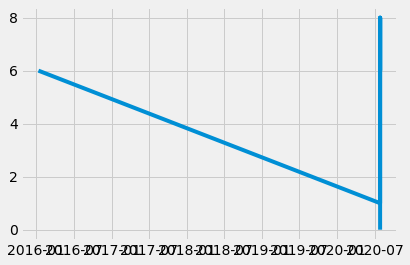

In [17]:
graph_data()

### Updating the database table

In [18]:
def update_table():
    c.execute("Select * from table1")
    print("Before Update : ")
    for row in c.fetchall():
        print(row)
    
    c.execute("update table1 set value=5.0 where value=2.0")
    conn.commit()
    print()
    
    c.execute("Select * from table1")
    print("After Update : ")
    for row in c.fetchall():
        print(row)

In [19]:
update_table()

Before Update : 
(1452549219.0, '2016-01-11 13:53:39', 'Python', 6.0)
(1595872757.0680954, '2020-07-27 23:29:17', 'Python', 1.0)
(1595872758.328502, '2020-07-27 23:29:18', 'Python', 3.0)
(1595872759.4834836, '2020-07-27 23:29:19', 'Python', 4.0)
(1595872760.6523373, '2020-07-27 23:29:20', 'Python', 4.0)
(1595872761.7979789, '2020-07-27 23:29:21', 'Python', 8.0)
(1595872762.9880073, '2020-07-27 23:29:22', 'Python', 6.0)
(1595872764.108341, '2020-07-27 23:29:24', 'Python', 7.0)
(1595872765.2598064, '2020-07-27 23:29:25', 'Python', 8.0)
(1595872766.4036715, '2020-07-27 23:29:26', 'Python', 3.0)
(1595872767.54614, '2020-07-27 23:29:27', 'Python', 0.0)

After Update : 
(1452549219.0, '2016-01-11 13:53:39', 'Python', 6.0)
(1595872757.0680954, '2020-07-27 23:29:17', 'Python', 1.0)
(1595872758.328502, '2020-07-27 23:29:18', 'Python', 3.0)
(1595872759.4834836, '2020-07-27 23:29:19', 'Python', 4.0)
(1595872760.6523373, '2020-07-27 23:29:20', 'Python', 4.0)
(1595872761.7979789, '2020-07-27 23:29:

### Deleting data from the database

In [20]:
def delete_value_from_the_database():
    c.execute("Select * from table1")
    print("Before Update : ")
    for row in c.fetchall():
        print(row)
    
    c.execute("delete from table1 where value=5.0")
    conn.commit()
    print()
    
    c.execute("Select * from table1")
    print("After Update : ")
    for row in c.fetchall():
        print(row)

In [21]:
delete_value_from_the_database()

Before Update : 
(1452549219.0, '2016-01-11 13:53:39', 'Python', 6.0)
(1595872757.0680954, '2020-07-27 23:29:17', 'Python', 1.0)
(1595872758.328502, '2020-07-27 23:29:18', 'Python', 3.0)
(1595872759.4834836, '2020-07-27 23:29:19', 'Python', 4.0)
(1595872760.6523373, '2020-07-27 23:29:20', 'Python', 4.0)
(1595872761.7979789, '2020-07-27 23:29:21', 'Python', 8.0)
(1595872762.9880073, '2020-07-27 23:29:22', 'Python', 6.0)
(1595872764.108341, '2020-07-27 23:29:24', 'Python', 7.0)
(1595872765.2598064, '2020-07-27 23:29:25', 'Python', 8.0)
(1595872766.4036715, '2020-07-27 23:29:26', 'Python', 3.0)
(1595872767.54614, '2020-07-27 23:29:27', 'Python', 0.0)

After Update : 
(1452549219.0, '2016-01-11 13:53:39', 'Python', 6.0)
(1595872757.0680954, '2020-07-27 23:29:17', 'Python', 1.0)
(1595872758.328502, '2020-07-27 23:29:18', 'Python', 3.0)
(1595872759.4834836, '2020-07-27 23:29:19', 'Python', 4.0)
(1595872760.6523373, '2020-07-27 23:29:20', 'Python', 4.0)
(1595872761.7979789, '2020-07-27 23:29:

## Closing the Cursor and the connection

In [22]:
c.close()
conn.close()